This is a practice notebook for Danish to learn Linear Regression by making a House Price Prediction model.


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [125]:
print(f'Shape: {df.shape[0]} rows & {df.shape[1]} columns')
print("\nMissing Values:", '\n', df.isnull().sum())
print('\nDuplicated Values:', df.duplicated().sum())

Shape: 5000 rows & 7 columns

Missing Values: 
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Duplicated Values: 0


**COMMENT(S):**
There are 5000 rows and 7 columns in our dataset. There are no missing values, so we will not have to do any imputation. There are no duplicated values (duplicated values provide no benefit or detriment for the model) so we will not have to remove any of those values or rows. The data is clean.

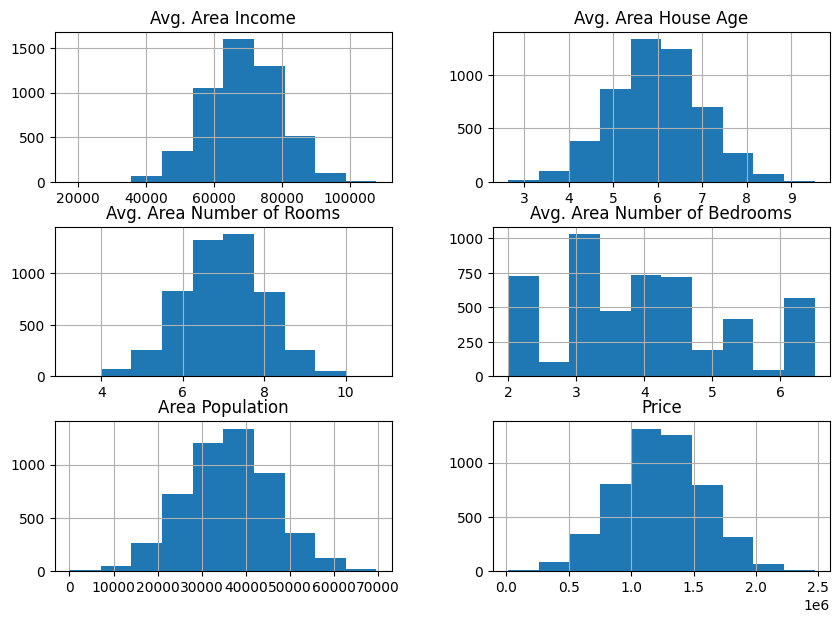

In [126]:
df.hist(figsize=(10,7))
plt.show()

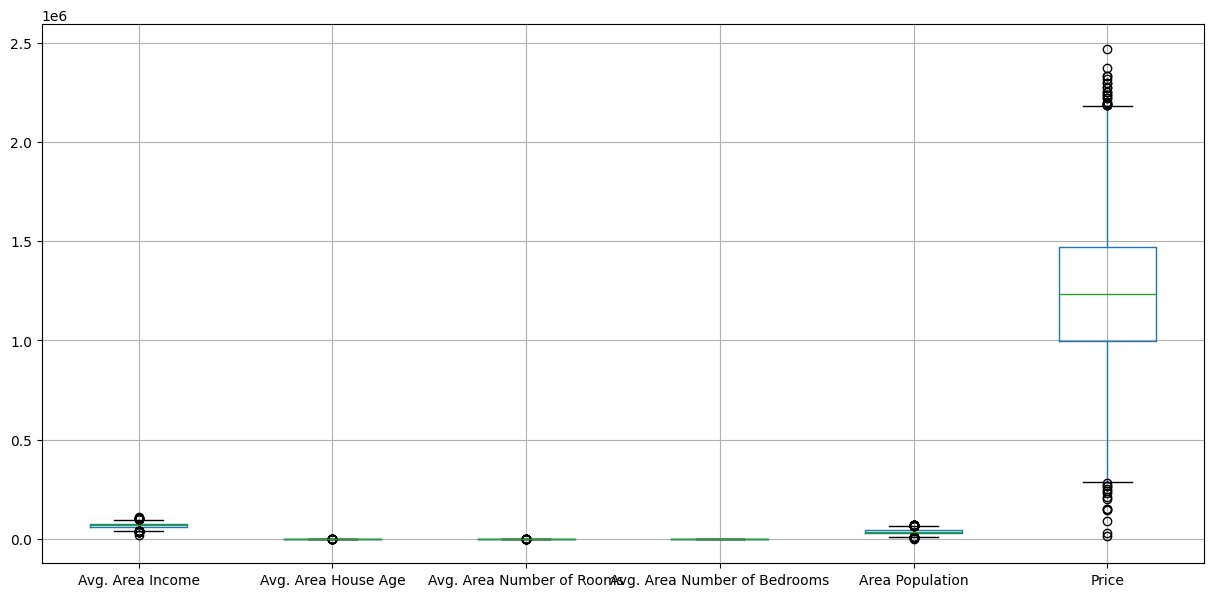

In [127]:
df.boxplot(figsize=(15,7))
plt.show()

**COMMENT(S):**
The boxplots look very squished while just the price plot is well made. This is because the scaling of the data for all features are unique and do not match the scale of the 'Price' feature. To address this, we may scale the data to give all features equal foooting. We will have to scale the data using StandardScaler anyways before fitting the model, so it is good to do it now and get some useful information along the way.

Categorical features will cause problems during the Standardization process, so we will find and remove all of those below.

In [128]:
categorical_columns = df.columns[df.dtypes == 'O'] # Finding categorical features
print('Categorical columns:', categorical_columns)
for col in categorical_columns:
  df.drop(col, axis=1, inplace=True) # Removing categorical features
df.head()

Categorical columns: Index(['Address'], dtype='object')


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [129]:
from sklearn.preprocessing import StandardScaler

scaler_old = StandardScaler()
df_scaled = scaler_old.fit_transform(df) # Fitting the scaler object to the data so that the scaler finds all necessary coefficients and statistics
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)

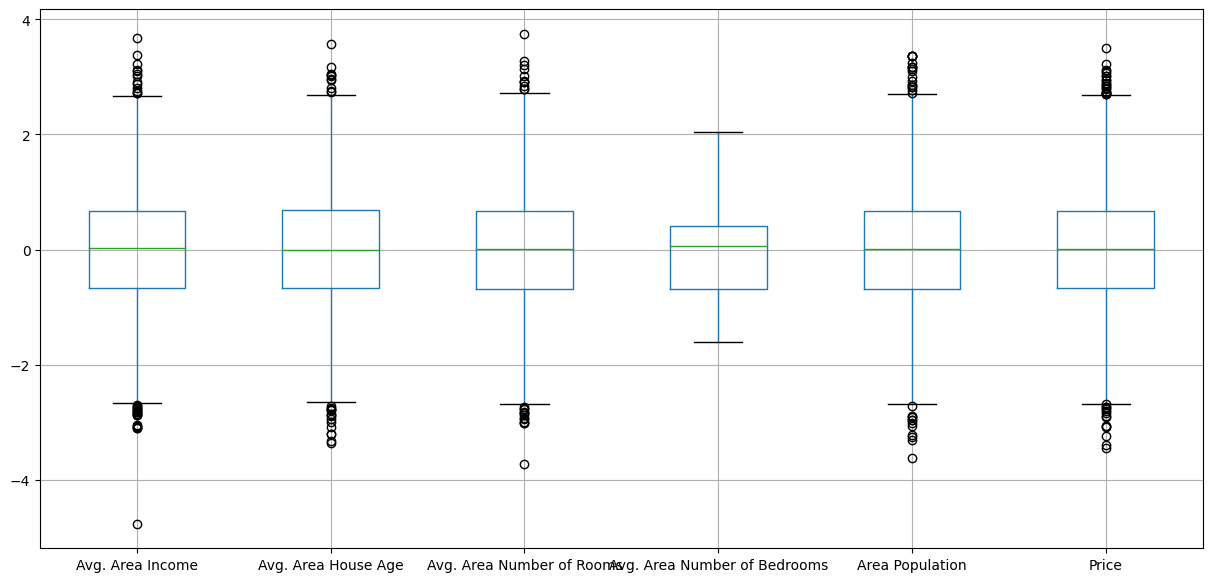

In [130]:
df_scaled.boxplot(figsize=(15,7))
plt.show()

In [131]:
df.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

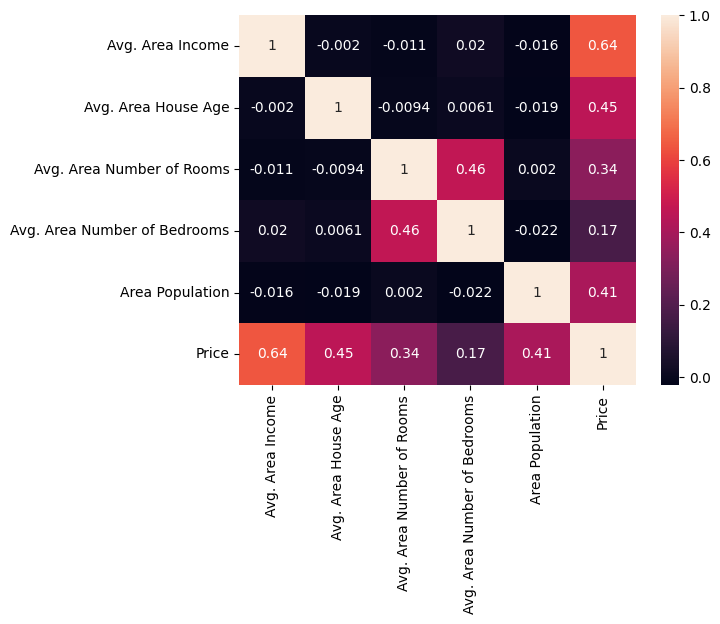

In [132]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [133]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix.values

array([[ 1.        , -0.00200683, -0.01103166,  0.01978822, -0.01623374,
         0.63973378],
       [-0.00200683,  1.        , -0.00942829,  0.00614892, -0.01874276,
         0.45254254],
       [-0.01103166, -0.00942829,  1.        ,  0.46269486,  0.00203993,
         0.33566445],
       [ 0.01978822,  0.00614892,  0.46269486,  1.        , -0.02216764,
         0.17107103],
       [-0.01623374, -0.01874276,  0.00203993, -0.02216764,  1.        ,
         0.40855588],
       [ 0.63973378,  0.45254254,  0.33566445,  0.17107103,  0.40855588,
         1.        ]])

In [134]:
# Loop through the correlation matrix and print correlations greater than 0.9
# This process avoids collinearity
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            col_name_1 = corr_matrix.columns[i]
            col_name_2 = corr_matrix.columns[j]
            print(f'Correlation greater than 0.9: {col_name_1} and {col_name_2}')

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [135]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [136]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df[['Price']]

# Base Linear Regression Model

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression_model = regression.fit(X_train, y_train) # Creating a model using the LinearRegression class

In [139]:
# Testing the base Linear Regression model

y_pred_test = regression_model.predict(X_test)

print("Predictions:")
for pred in y_pred_test[:3]:
    print(round(pred[0], 2))

print("\nActual:")
for value in y_test['Price'][:3]:
    print(value)


Predictions:
1308587.93
1237037.23
1243429.34

Actual:
1339096.0772451318
1251794.178836864
1340094.9662054193


In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 10089009300.893988
MAE: 80879.09723489442
RMSE: 100444.0605555848
R2 Score: 0.9179971706834331


# Lasso Linear Regression Model

In [141]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_model = lasso.fit(X_train, y_train)

In [142]:
# Testing the Lasso Linear Regression model

lasso_y_pred_test = lasso_model.predict(X_test)

print("Predictions:")
for pred in lasso_y_pred_test[:3]:
    print(round(pred, 2))

print("\nActual:")
for value in y_test['Price'][:3]:
    print(value)

Predictions:
1308587.28
1237037.25
1243430.75

Actual:
1339096.0772451318
1251794.178836864
1340094.9662054193


In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso_mse = mean_squared_error(y_test, lasso_y_pred_test)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred_test)
lasso_rmse = np.sqrt(mse)
lasso_r2 = r2_score(y_test, lasso_y_pred_test)

print(f'MSE: {lasso_mse}')
print(f'MAE: {lasso_mae}')
print(f'RMSE: {lasso_rmse}')
print(f'R2 Score: {lasso_r2}')

MSE: 10088999283.031282
MAE: 80879.05074052254
RMSE: 100444.0605555848
R2 Score: 0.9179972521079874


In [144]:
print(r2 > lasso_r2)

False


**COMMENT(S):**
After a few 'Run All' commands, the output above has resulted in True or False interchangeably and randomly, so we will use the base model due to it being more transparent.

Note: This was before setting the random state. Now, the output is consistently False. Still, we'll be using the base model because it is more clear in what the independent features are.

# Ridge Regression Model

In [145]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)

In [146]:
# Testing the Ridge Linear Regression model

ridge_y_pred_test = ridge_model.predict(X_test)

print("Predictions:")
for pred in ridge_y_pred_test[:3]:
    print(round(pred[0], 2))

print("\nActual:")
for value in y_test['Price'][:3]:
    print(value)

Predictions:
1308560.02
1237021.52
1243397.44

Actual:
1339096.0772451318
1251794.178836864
1340094.9662054193


In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_mse = mean_squared_error(y_test, lasso_y_pred_test)
ridge_mae = mean_absolute_error(y_test, lasso_y_pred_test)
ridge_rmse = np.sqrt(mse)
ridge_r2 = r2_score(y_test, lasso_y_pred_test)

print(f'MSE: {ridge_mse}')
print(f'MAE: {ridge_mae}')
print(f'RMSE: {ridge_rmse}')
print(f'R2 Score: {ridge_r2}')

MSE: 10088999283.031282
MAE: 80879.05074052254
RMSE: 100444.0605555848
R2 Score: 0.9179972521079874


**COMMENT(S):**
The r2 accuracy score was very similar to the base linear regression model and the lasso model, so we will be using the base linear regression model for the earlier stated reasons.

# Elastic Net Regression Model

In [148]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic_model = elastic.fit(X_train, y_train)

In [149]:
# Test the Elastic Net Linear Regression Model

elastic_y_pred_test = elastic_model.predict(X_test)

elastic_mse = mean_squared_error(y_test, elastic_y_pred_test)
elastic_mae = mean_absolute_error(y_test, elastic_y_pred_test)
elastic_rmse = np.sqrt(mse)
elastic_r2 = r2_score(y_test, elastic_y_pred_test)

print(f'MSE: {elastic_mse}')
print(f'MAE: {elastic_mae}')
print(f'RMSE: {elastic_rmse}')
print(f'R2 Score: {elastic_r2}')

MSE: 23175809406.382103
MAE: 120584.2937022892
RMSE: 100444.0605555848
R2 Score: 0.8116284873623385


**COMMENT(S):**
Elastic Net performs relatively subpar compared to Ridge, Lasso, and the base Linear Regression models, so we will continue to use the base model.

# Performing Cross Validation

In [150]:
from sklearn.model_selection import cross_val_score

cv_regression_model = LinearRegression()
cv_scores = cross_val_score(cv_regression_model, X_train, y_train, cv=10)

print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.90917181 0.91727003 0.91281918 0.90697909 0.91750831 0.92150226
 0.92029966 0.92025849 0.91942055 0.92761298]
Mean Cross-validation Score: 0.9172842372889519


# Pickling

In [151]:
# Pickling the model for future use
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(cv_regression_model, open('hpp_model.pkl', 'wb'))

# New Base Linear Regression Model

In [152]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


**COMMENT(S):**
For this new base linear regression model, I just want to take 'Avg. Area Income,' 'Avg. Area House Age,' and 'Area Population since they all have a 0.40+ correlation to the 'Price' feature.

In [153]:
X_new = df[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]
y_new = df[['Price']]

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, train_size=0.80, random_state=42)

# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
from sklearn.linear_model import LinearRegression

new_regression = LinearRegression()
new_regression_model = regression.fit(X_train, y_train) # Creating a model using the LinearRegression class

In [156]:
# Testing the new base Linear Regression model

new_y_pred_test = new_regression_model.predict(X_test)

print("Predictions:")
for pred in new_y_pred_test[:3]:
    print(round(abs(pred[0]), 2))

print("\nActual:")
for value in y_test['Price'][:3]:
    print(value)


Predictions:
1373088.49
1244916.23
1285455.51

Actual:
1339096.0772451318
1251794.178836864
1340094.9662054193


In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

new_mse = mean_squared_error(y_test, new_y_pred_test)
new_mae = mean_absolute_error(y_test, new_y_pred_test)
new_rmse = np.sqrt(mse)
new_r2 = r2_score(y_test, new_y_pred_test)

print(f'MSE: {new_mse}')
print(f'MAE: {new_mae}')
print(f'RMSE: {new_rmse}')
print(f'R2 Score: {new_r2}')

MSE: 25217178477.03728
MAE: 126906.14302164043
RMSE: 100444.0605555848
R2 Score: 0.7950363687032526


**COMMENT(S):**
According to the R2 score, the new model does not perform as optimal as the first initial model, so we will continue with that scaler and model pkl file.